In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [2]:
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
Total_logins=(len(engagement))
Total_logins

207917

In [5]:
engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [6]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [7]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
users = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")

In [9]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time']=pd.to_datetime(users['last_session_creation_time'], unit='s')

In [11]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [12]:
report = users.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

The last session creation time is missing for several users as well as the invited by user id. The invited by user id may be due to the fact that users themselves can sign up without help.

In [13]:
users['invited_by_user_id'].isnull().sum()

5583

In [14]:
users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [15]:
2111+2087+1385

5583

the exact number of missing values appears to be the Personal Projects, signed up via google or with their own account.

In [16]:
usersmissingid = users[users['invited_by_user_id'].isnull()==True]

In [17]:
usersmissingid['creation_source'].value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [18]:
users['creation_source'].fillna(0)

0              GUEST_INVITE
1                ORG_INVITE
2                ORG_INVITE
3              GUEST_INVITE
4              GUEST_INVITE
                ...        
11995            ORG_INVITE
11996    SIGNUP_GOOGLE_AUTH
11997          GUEST_INVITE
11998     PERSONAL_PROJECTS
11999                SIGNUP
Name: creation_source, Length: 12000, dtype: object

In [19]:
users['invited_by_user_id'].fillna(0)

0        10803.0
1          316.0
2         1525.0
3         5151.0
4         5240.0
          ...   
11995     8263.0
11996        0.0
11997     8074.0
11998        0.0
11999        0.0
Name: invited_by_user_id, Length: 12000, dtype: float64

Theory is confirmed. Now to look at the values for the last session creation time. 

In [20]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [21]:
user_counts = pd.DataFrame(engagement.groupby(['user_id']).size())

In [22]:
user_counts.head()

,0
user_id,
1,1
2,14
3,1
4,1
5,1


In [23]:
user_counts.rename({0: 'count'}, axis=1,inplace=True)

In [24]:
user_counts.head()

,count
user_id,
1,1
2,14
3,1
4,1
5,1


In [25]:
user_counts.sort_values('count',ascending=False)

,count
user_id,
3623,606
906,600
1811,593
7590,590
8068,585
...,...
4699,1
4698,1
4697,1


In [26]:
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    df = df.drop_duplicates(subset='time_stamp').sort_values('time_stamp')
    passed_days = df['time_stamp'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [27]:
# run the function on all users
adopted = engagement.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [28]:
user_counts['adopted']=adopted

In [29]:
user_counts['adopted'].value_counts()

False    7167
True     1656
Name: adopted, dtype: int64

Of the 8823 users, only 1656 are adopted users. 

In [30]:
user_counts.head()

,count,adopted
user_id,,
1,1,False
2,14,True
3,1,False
4,1,False
5,1,False


In [31]:
users['org_id'].value_counts().head()

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64

In [32]:
len(users['org_id'].value_counts())

417

In [33]:
users['invited_by_user_id'].value_counts().head()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
Name: invited_by_user_id, dtype: int64

In [34]:
len(users['invited_by_user_id'].value_counts())

2564

interestingly enough, the organizations with the most are not the same as the ones with the most invites. This may be too much to put into the model. There are 417 different organizations and 2564 users. having a usage column may help. This usage column will be the length of time between the start data and the most recent date. I am going to start with building the model including the org id.

In [35]:
users['usage'] = (users['last_session_creation_time'] - users['creation_time']).dt.days

In [36]:
latest = max(users['creation_time'])

In [37]:
latest

Timestamp('2014-05-30 23:59:19')

In [38]:
users['account_age'] = (latest - users['creation_time']).dt.days

In [39]:
users.drop(['creation_time', 'last_session_creation_time','invited_by_user_id','name','email'], axis=1,inplace=True)

In [40]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   usage                       8823 non-null   float64
 6   account_age                 12000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 656.4+ KB


In [41]:
users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,usage,account_age
0,1,GUEST_INVITE,1,0,11,0.0,38
1,2,ORG_INVITE,0,0,1,136.0,196
2,3,ORG_INVITE,0,0,94,0.0,437
3,4,GUEST_INVITE,0,0,1,1.0,374
4,5,GUEST_INVITE,0,0,193,5.0,498


In [42]:
one_hot = pd.get_dummies(users['creation_source'])

In [43]:
users = users.join(one_hot)

In [44]:
users = users.set_index('object_id')
users.index.name = 'user_id'
data = pd.concat([users, adopted], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

In [45]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,usage,account_age,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,adopted_user
user_id,,,,,,,,,,,,
1,GUEST_INVITE,1,0,11,0.0,38,1,0,0,0,0,0
2,ORG_INVITE,0,0,1,136.0,196,0,1,0,0,0,1
3,ORG_INVITE,0,0,94,0.0,437,0,1,0,0,0,0
4,GUEST_INVITE,0,0,1,1.0,374,1,0,0,0,0,0
5,GUEST_INVITE,0,0,193,5.0,498,1,0,0,0,0,0


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

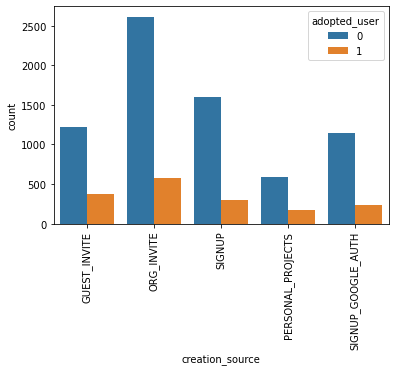

In [47]:
_ = sns.countplot(x='creation_source', data=data, hue='adopted_user')
_ = plt.xticks(rotation=90)

user rention is very low as shown above. I am not surprised that organization invites have more retained users.

In [49]:
data.drop(['creation_source'],axis=1,inplace=True)
data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,usage,account_age,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,adopted_user
user_id,,,,,,,,,,,
1,1,0,11,0.0,38,1,0,0,0,0,0
2,0,0,1,136.0,196,0,1,0,0,0,1
3,0,0,94,0.0,437,0,1,0,0,0,0
4,0,0,1,1.0,374,1,0,0,0,0,0
5,0,0,193,5.0,498,1,0,0,0,0,0


In [52]:
data.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,usage,account_age,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,adopted_user
user_id,,,,,,,,,,,
1,1,0,11,0.0,38,1,0,0,0,0,0
2,0,0,1,136.0,196,0,1,0,0,0,1
3,0,0,94,0.0,437,0,1,0,0,0,0
4,0,0,1,1.0,374,1,0,0,0,0,0
5,0,0,193,5.0,498,1,0,0,0,0,0


The result will be binary either the user will or will not continue to use the product. RandomForest would be a good option in building this model. 

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

In [68]:
y = data['adopted_user']
X = data.drop(['adopted_user'], axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [70]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [72]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.963
Random Forest: f1-score=0.963


96% accuracy is actually quite good for a first model. 

10


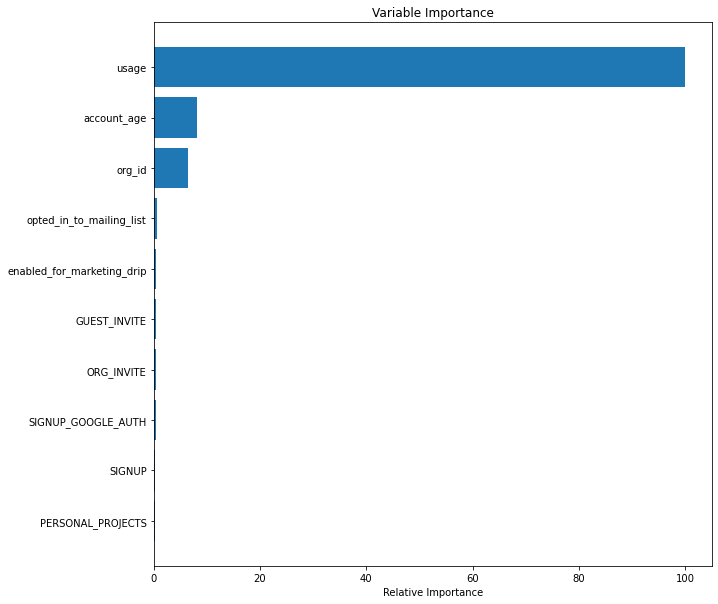

In [74]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

As I thought the organization ID is important to this model. I felt it would be a useful classifier, for instance if an organization uses Google's platform for their work, workers are less likely to be using Microsoft for their work as it probably is not available to them. I am extremely not surprise abou the personal projects being low. Thinking about my own work, I only have 1-2 collaborative items and those are shared folders with my husband that I rarely use. 

Though the usage really plays a role in this, it really cannot be predicted right off the bat. If I were to do this again, which I will below I would repeat without the usage and account age. If this model is to predict if a new user is going to active you will not have that information on them. The other information would be available. 

In [75]:
y = data['adopted_user']
X = data.drop(['adopted_user','usage','account_age'], axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [77]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.754
Random Forest: f1-score=0.727


The data had some missing values and I chose to zero fill them as they were information such as which user recommened them. In looking into the data, I saw that this was most probably due to lack of a user inviting them as in they discovered this on their own. Information for last session creation time were missing. Probably due to them not actualluy doing anything in the product. 

Looking into the data I added information about the user usage and age of the account and honestly it felt like the model just was not right. I felt the prompt was asking if a new user would become an active user and that model, though it performed very well, was not the model to predict that. I regrouped and built a second model that I feel is more accurate for that type of prompt.

The last model is only 75% accurate at predicting if a user will continue usage. Obviously this model is less accurate, but it is probably most representative of a new user. Other factors go into if a user will or will not continue usage. Anything from color of icons, to sound effects can change a person from continuing to use a platform. I should know, even if its a minor thing I will discontinue usage because I want to only deal with fun/easy to use things that help me. If I am annoyed with how something looks or works I am more than likely to stop using it. All of these nuances are based on preference and would not be able to be added into this model. A model of 75% though not as ideal, can still help in determinating if a user will stay on. Both models would be beneficial to the company. One model to predict new u